In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt, matplotlib.image as mpimg
import time 
import warnings
from sklearn import svm
from sklearn.model_selection import GridSearchCV

%matplotlib inline
warnings.filterwarnings('ignore')

print(os.listdir("../digitRecognizer"))

['.ipynb_checkpoints', 'digit-recognizer.zip', 'digitRecognizer.ipynb', 'programs', 'sample_submission.csv', 'test.csv', 'train.csv']


In [2]:
data = pd.read_csv('../digitRecognizer/train.csv')
print("Train Data Shape is: ",data.shape)
data.head()

Train Data Shape is:  (42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
label = data.label
data=data.drop('label',axis=1)
print("Data Shape: ",data.shape)
print("Label Shape: ",label.shape)

Data Shape:  (42000, 784)
Label Shape:  (42000,)


In [4]:
data.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

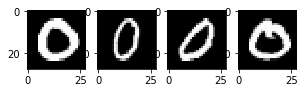

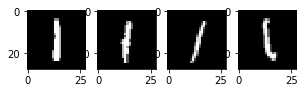

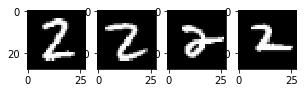

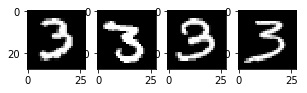

In [5]:
for x in range(0,4):
    train_0=data[label==x]
    data_new=[]
    for idx in train_0.index:
        val=train_0.loc[idx].values.reshape(28,28)
        data_new.append(val)
    plt.figure(figsize=(25,25))   
    for x in range(1,5):
        ax1=plt.subplot(1, 20, x)
        ax1.imshow(data_new[x],cmap='gray')

Text(0, 0.5, 'Frequency')

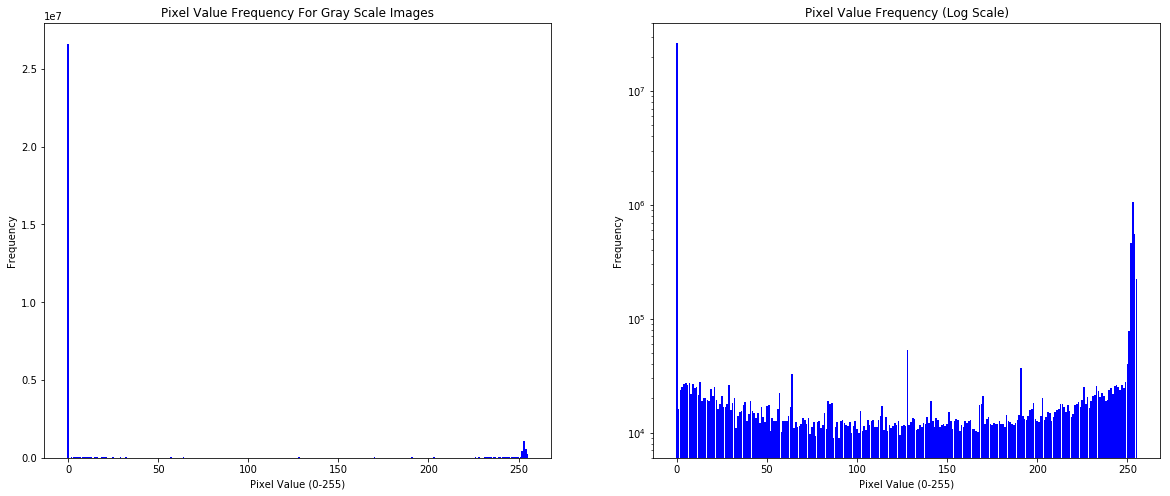

In [6]:
y = pd.value_counts(data.values.ravel()).sort_index()
N = len(y)
x = range(N)
width =0.9
plt.figure(figsize=[20,8])
ax1=plt.subplot(1, 2,1)
ax1.bar(x, y, width, color="blue")
plt.title('Pixel Value Frequency For Gray Scale Images')
plt.xlabel('Pixel Value (0-255)')
plt.ylabel('Frequency')
#ax1.imshow(data_new[x],cmap='gray')
ax2=plt.subplot(1, 2,2)
ax2.bar(x, y, width, color="blue")
plt.title('Pixel Value Frequency (Log Scale)')
plt.yscale('log')
plt.xlabel('Pixel Value (0-255)')
plt.ylabel('Frequency')
#plt.yscale('')

In [7]:
train, test,train_labels, test_labels = train_test_split(data, label, train_size=0.8, random_state=42)
print("Train Data Shape: ",train.shape)
print("Train Label Shape: ",train_labels.shape)
print("Test Data Shape: ",test.shape)
print("Test Label Shape: ",test_labels.shape)

Train Data Shape:  (33600, 784)
Train Label Shape:  (33600,)
Test Data Shape:  (8400, 784)
Test Label Shape:  (8400,)


In [8]:
i=5000;
score=[]
fittime=[]
scoretime=[]
clf = svm.SVC(random_state=42)

In [9]:
print("Default Parameters are: \n",clf.get_params)

Default Parameters are: 
 <bound method BaseEstimator.get_params of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False)>


In [10]:
start_time = time.time()
clf.fit(train[:i], train_labels[:i].values.ravel())
fittime = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(fittime)))
start_time = time.time()
score=clf.score(test,test_labels)
print("Accuracy for grayscale: ",score)
scoretime = time.time() - start_time
print("Time consumed to score: ",time.strftime("%H:%M:%S", time.gmtime(scoretime)))
case1=[score,fittime,scoretime]

Time consumed to fit model:  00:00:43
Accuracy for grayscale:  0.09345238095238095
Time consumed to score:  00:00:37


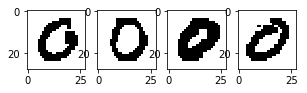

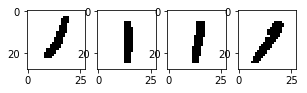

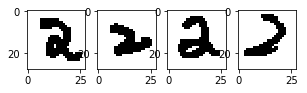

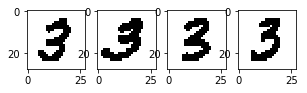

In [11]:
test_b=test
train_b=train
test_b[test_b>0]=1
train_b[train_b>0]=1
for x in range(0,4):
    train_0=train_b[train_labels==x]
    data_new=[]
    for idx in train_0.index:
        val=train_0.loc[idx].values.reshape(28,28)
        data_new.append(val)
    plt.figure(figsize=(25,25))   
    for x in range(1,5):
        ax1=plt.subplot(1, 20, x)
        ax1.imshow(data_new[x],cmap='binary')

In [12]:
start_time = time.time()
clf.fit(train_b[:i], train_labels[:i].values.ravel())
fititme = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(fittime)))
score=clf.score(test_b,test_labels)
start_time = time.time()
clf.fit(train_b[:i], train_labels[:i].values.ravel())
print("Accuracy for binary: ",score)
scoretime = time.time() - start_time
print("Time consumed to score: ",time.strftime("%H:%M:%S", time.gmtime(scoretime)))
case2=[score,fittime,scoretime]

Time consumed to fit model:  00:00:43
Accuracy for binary:  0.9111904761904762
Time consumed to score:  00:00:09


Text(0, 0.5, 'Variance')

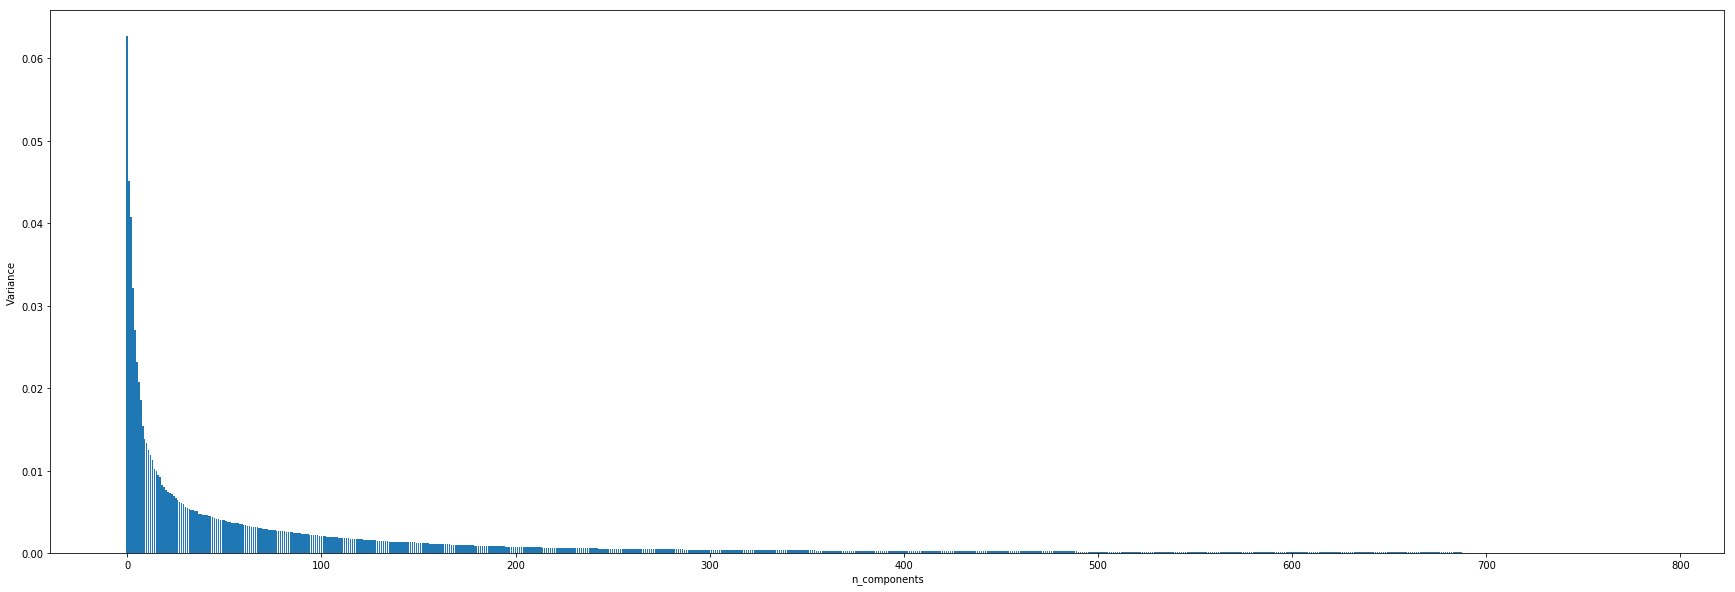

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA

#standardized data
sc = StandardScaler().fit(train)
X_std_train = sc.transform(train)
X_std_test = sc.transform(test)

#If n_components is not set then all components are stored 
sklearn_pca = sklearnPCA().fit(X_std_train)
train_pca = sklearn_pca.transform(X_std_train)
test_pca = sklearn_pca.transform(X_std_test)

#Percentage of variance explained by each of the selected components.
#If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.
var_per = sklearn_pca.explained_variance_ratio_
cum_var_per = sklearn_pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(30,10))
ind = np.arange(len(var_per)) 
plt.bar(ind,var_per)
plt.xlabel('n_components')
plt.ylabel('Variance')

In [14]:
n_comp=len(cum_var_per[cum_var_per <= 0.90])
print("Keeping 90% Info with ",n_comp," components")
sklearn_pca = sklearnPCA(n_components=n_comp)
train_pca = sklearn_pca.fit_transform(X_std_train)
test_pca = sklearn_pca.transform(X_std_test)
print("Shape before PCA for Train: ",X_std_train.shape)
print("Shape after PCA for Train: ",train_pca.shape)
print("Shape before PCA for Test: ",X_std_test.shape)
print("Shape after PCA for Test: ",test_pca.shape)

Keeping 90% Info with  288  components
Shape before PCA for Train:  (33600, 784)
Shape after PCA for Train:  (33600, 288)
Shape before PCA for Test:  (8400, 784)
Shape after PCA for Test:  (8400, 288)


In [15]:
start_time = time.time()
clf.fit(train_pca[:i], train_labels[:i].values.ravel())
fittime = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(fittime)))
start_time = time.time()
score=clf.score(test_pca,test_labels)
print("Accuracy for grayscale: ",score)
scoretime = time.time() - start_time
print("Time consumed to score model: ",time.strftime("%H:%M:%S", time.gmtime(scoretime)))
case3=[score,fittime,scoretime]

Time consumed to fit model:  00:00:05
Accuracy for grayscale:  0.9196428571428571
Time consumed to score model:  00:00:07


Text(0, 0.5, 'Variance')

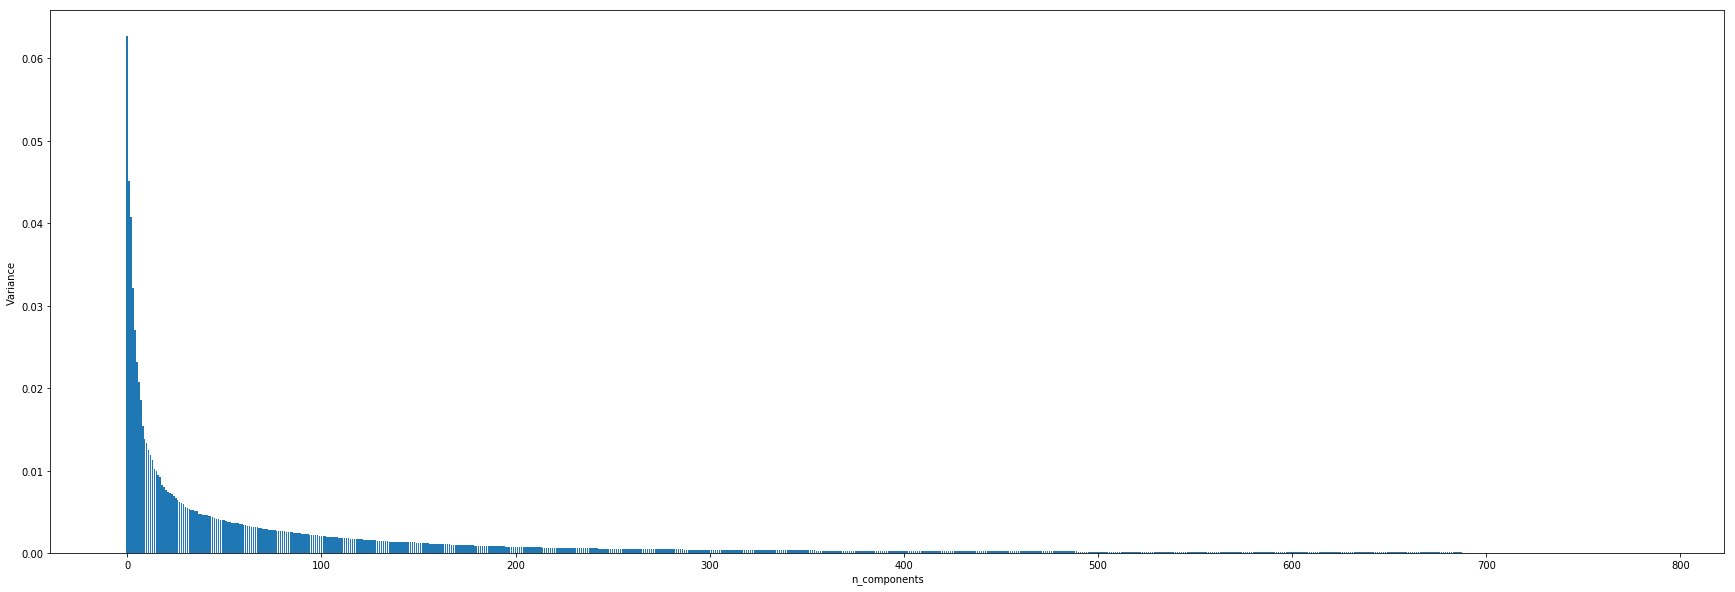

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA

#standardized data
sc = StandardScaler().fit(train_b)
X_std_train = sc.transform(train_b)
X_std_test = sc.transform(test_b)

#If n_components is not set then all components are stored 
sklearn_pca = sklearnPCA().fit(X_std_train)
#train_pca_b = sklearn_pca.transform(X_std_train)
#test_pca_b = sklearn_pca.transform(X_std_test)

#Percentage of variance explained by each of the selected components.
#If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.
var_per = sklearn_pca.explained_variance_ratio_
cum_var_per = sklearn_pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(30,10))
ind = np.arange(len(var_per)) 
plt.bar(ind,var_per)
plt.xlabel('n_components')
plt.ylabel('Variance')

In [17]:
n_comp=len(cum_var_per[cum_var_per <= 0.90])
print("Keeping 90% Info with ",n_comp," components")
sklearn_pca = sklearnPCA(n_components=n_comp)
train_pca_b = sklearn_pca.fit_transform(X_std_train)
test_pca_b = sklearn_pca.transform(X_std_test)
print("Shape before PCA for Train: ",X_std_train.shape)
print("Shape after PCA for Train: ",train_pca_b.shape)
print("Shape before PCA for Test: ",X_std_test.shape)
print("Shape after PCA for Test: ",test_pca_b.shape)

Keeping 90% Info with  288  components
Shape before PCA for Train:  (33600, 784)
Shape after PCA for Train:  (33600, 288)
Shape before PCA for Test:  (8400, 784)
Shape after PCA for Test:  (8400, 288)


In [18]:
start_time = time.time()
clf.fit(train_pca_b[:i], train_labels[:i].values.ravel())
fittime = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(fittime)))
start_time = time.time()
score=clf.score(test_pca_b,test_labels)
print("Accuracy for grayscale: ",score)
scoretime = time.time() - start_time
print("Time consumed to score model: ",time.strftime("%H:%M:%S", time.gmtime(scoretime)))
case4=[score,fittime,scoretime]

Time consumed to fit model:  00:00:05
Accuracy for grayscale:  0.9186904761904762
Time consumed to score model:  00:00:07


In [19]:
head =["Accuracy","FittingTime","ScoringTime"]
print("\t\t case1 \t\t\t case2 \t\t\t case3 \t\t\t case4")
for h, c1, c2, c3, c4 in zip(head, case1, case2, case3, case4):
    print("{}\t{}\t{}\t{}\t{}".format(h, c1, c2, c3, c4))

		 case1 			 case2 			 case3 			 case4
Accuracy	0.09345238095238095	0.9111904761904762	0.9196428571428571	0.9186904761904762
FittingTime	43.66637444496155	43.66637444496155	5.507627487182617	5.590875625610352
ScoringTime	37.943958044052124	9.998165845870972	7.891035318374634	7.985548496246338


In [20]:
from tqdm import tqdm

fit_time=[]
score=[]
score_time=[]
for j in tqdm(range(1000,31000,5000)):
    start_time = time.time()
    clf.fit(train_pca_b[:j], train_labels[:j].values.ravel())
    fit_time.append(time.time() - start_time)
    start_time = time.time()
    score.append(clf.score(test_pca_b,test_labels))
    score_time.append(time.time() - start_time)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [05:53<00:00, 75.29s/it]


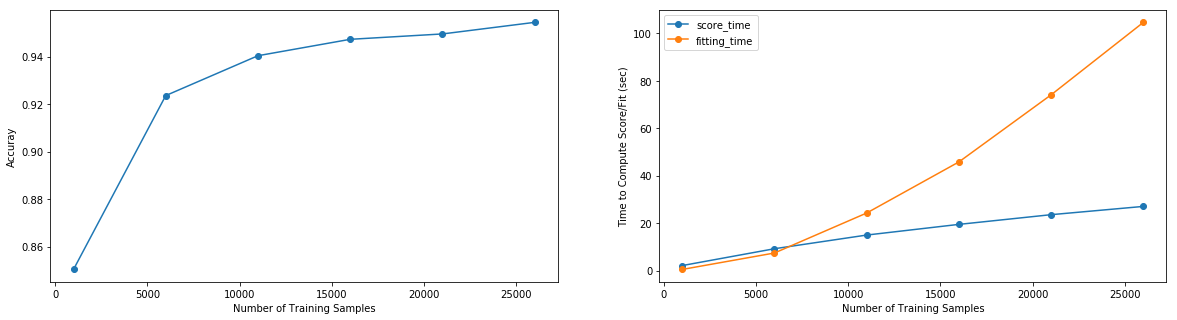

In [21]:
x=list(range(1000,31000,5000))
plt.figure(figsize=[20,5]);
ax1=plt.subplot(1, 2,1)
ax1.plot(x,score,'-o');
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuray')
ax2=plt.subplot(1, 2,2)
ax2.plot(x,score_time,'-o');
ax2.plot(x,fit_time,'-o');
plt.xlabel('Number of Training Samples')
plt.ylabel('Time to Compute Score/Fit (sec)')
plt.legend(['score_time','fitting_time'])

In [22]:
clf.get_params

<bound method BaseEstimator.get_params of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False)>

In [23]:
parameters = {'gamma': [1, 0.1, 0.01, 0.001],
             'C': [1000, 100, 10, 1]} 

p = GridSearchCV(clf , param_grid=parameters, cv=3)

In [24]:
X=train_pca_b[:i]
y=train_labels[:i].values.ravel()
start_time = time.time()
p.fit(X,y)
elapsed_time = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

Time consumed to fit model:  00:07:57


In [25]:
print("Scores for all Parameter Combination: \n",p.cv_results_['mean_test_score'])
print("\nOptimal C and Gamma Combination: ",p.best_params_)
print("\nMaximum Accuracy acheieved on LeftOut Data: ",p.best_score_)

Scores for all Parameter Combination: 
 [0.113  0.1818 0.7806 0.9282 0.113  0.1818 0.7806 0.9282 0.113  0.1818
 0.7806 0.9318 0.1126 0.1762 0.7636 0.919 ]

Optimal C and Gamma Combination:  {'C': 10, 'gamma': 0.001}

Maximum Accuracy acheieved on LeftOut Data:  0.9318


In [26]:
C=p.best_params_['C']
gamma=p.best_params_['gamma']
clf=svm.SVC(C=C,gamma=gamma, random_state=42)

In [27]:
start_time = time.time()
clf.fit(train_pca_b[:i], train_labels[:i].values.ravel())
elapsed_time = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))
print("Accuracy for binary: ",clf.score(test_pca_b,test_labels))

Time consumed to fit model:  00:00:02
Accuracy for binary:  0.9366666666666666


In [28]:
start_time = time.time()
clf.fit(train_pca_b, train_labels.values.ravel())
elapsed_time = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))
print("Accuracy for binary: ",clf.score(test_pca_b,test_labels))

Time consumed to fit model:  00:01:07
Accuracy for binary:  0.9677380952380953


In [29]:
train_data = data #read and label removed in initial steps
train_label=label
test_data = pd.read_csv('../digitRecognizer/test.csv')

In [30]:
train_data[train_data>0]=1
test_data[test_data>0]=1

Text(0, 0.5, 'Variance')

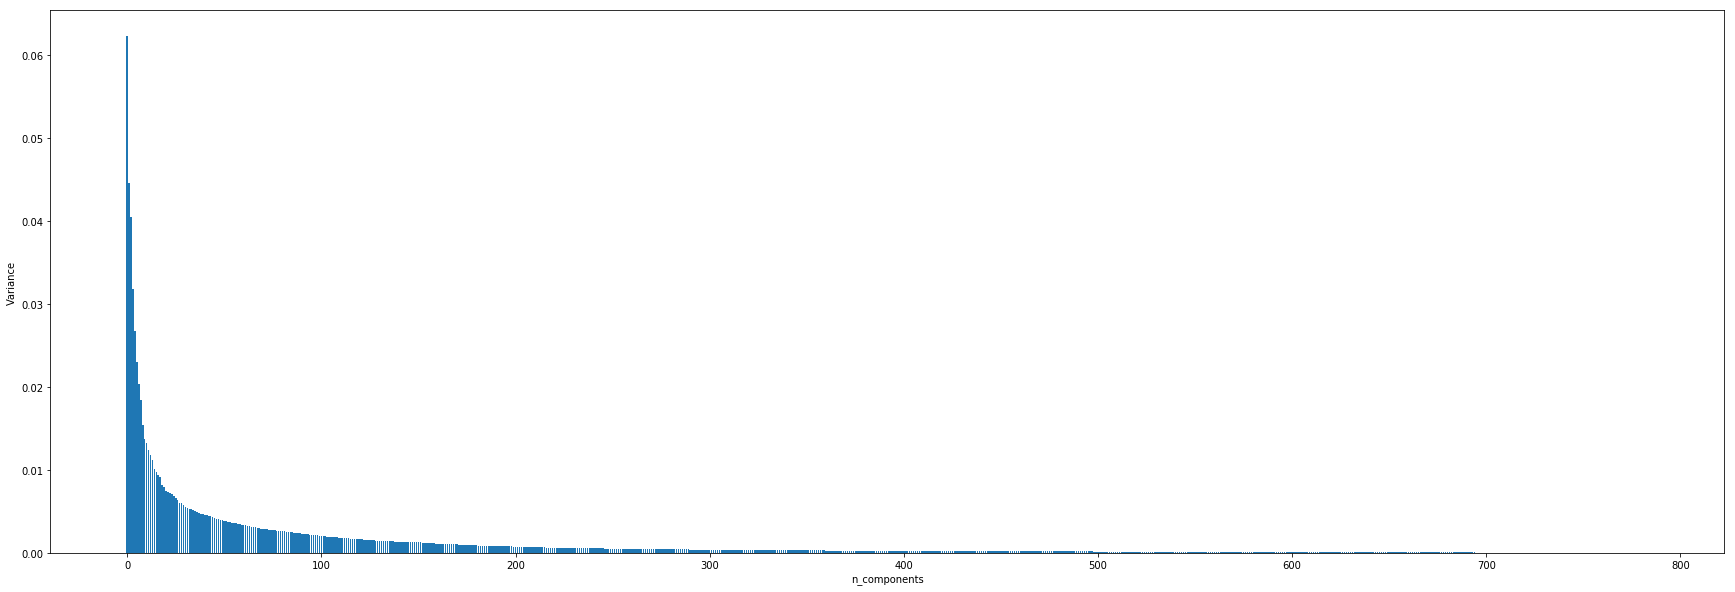

In [31]:
#standardize data
sc = StandardScaler().fit(train_data)
X_std_train = sc.transform(train_data)
X_std_test = sc.transform(test_data)

#If n_components is not set then all components are stored 
sklearn_pca = sklearnPCA().fit(X_std_train)

#Percentage of variance explained by each of the selected components.
#If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.
var_per = sklearn_pca.explained_variance_ratio_
cum_var_per = sklearn_pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(30,10))
ind = np.arange(len(var_per)) 
plt.bar(ind,var_per)
plt.xlabel('n_components')
plt.ylabel('Variance')

In [32]:
n_comp=len(cum_var_per[cum_var_per <= 0.90])
print("Keeping 90% Info with ",n_comp," components")
sklearn_pca = sklearnPCA(n_components=n_comp)
train_pca_b = sklearn_pca.fit_transform(X_std_train)
test_pca_b = sklearn_pca.transform(X_std_test)
print("Shape before PCA for Train: ",X_std_train.shape)
print("Shape after PCA for Train: ",train_pca_b.shape)
print("Shape before PCA for Test: ",X_std_test.shape)
print("Shape after PCA for Test: ",test_pca_b.shape)

Keeping 90% Info with  293  components
Shape before PCA for Train:  (42000, 784)
Shape after PCA for Train:  (42000, 293)
Shape before PCA for Test:  (28000, 784)
Shape after PCA for Test:  (28000, 293)


In [33]:
start_time = time.time()
clf.fit(train_pca_b, label.values.ravel())
fittime = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(fittime)))

Time consumed to fit model:  00:01:34


In [34]:
start_time = time.time()
result=clf.predict(test_pca_b)
print("Accuracy for Binary(PCA): ",result)
elapsed_time = time.time() - start_time
print("Time consumed to predict: ",time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

Accuracy for Binary(PCA):  [2 0 9 ... 3 9 2]
Time consumed to predict:  00:01:25


In [35]:
data_to_submit = pd.DataFrame({
    'ImageId':test_data.index.values+1,
    'Label':result
})
data_to_submit.index=data_to_submit['ImageId'].values

data_to_submit.to_csv('result.csv', index = False)